In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [30]:
import pandas as pd

stock = pd.read_excel("C:/Users/user/Desktop/SALFORD 2/sku_data.xlsx")

print(stock.info())
print(stock.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2279 non-null   int64  
 1   Unitprice        2279 non-null   float64
 2   Expire date      2279 non-null   int64  
 3   Outbound number  2279 non-null   int64  
 4   Total outbound   2279 non-null   float64
 5   Pal grossweight  2279 non-null   float64
 6   Pal height       2279 non-null   float64
 7   Units per pal    2279 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 142.6 KB
None
   ID  Unitprice  Expire date  Outbound number  Total outbound  \
0   1      0.058          547                9          2441.0   
1   2      0.954          547                0             0.0   
2   3      2.385          547               12            23.0   
3   4      5.100          547                0             0.0   
4   5      0.000          547                0 

In [31]:
stock

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
0,1,0.058,547,9,2441.0,105.60,1.56,1920
1,2,0.954,547,0,0.0,207.68,1.00,384
2,3,2.385,547,12,23.0,165.78,1.02,108
3,4,5.100,547,0,0.0,221.04,1.05,72
4,5,0.000,547,0,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...
2274,2275,0.000,0,0,0.0,2.70,0.00,10
2275,2276,0.000,0,1,1.0,9.58,0.00,1
2276,2277,0.000,0,0,0.0,38.36,0.00,4
2277,2278,0.000,0,1,1.0,25.11,0.00,3


# Exploratory Data Analysis (EDA)

In [32]:
print(stock.describe())

                ID    Unitprice  Expire date  Outbound number  Total outbound  \
count  2279.000000  2279.000000  2279.000000      2279.000000     2279.000000   
mean   1140.000000     4.269402   410.371654       235.976305      731.701053   
std     658.034953    14.449000   240.875419       700.230685     2146.029848   
min       1.000000     0.000000     0.000000         0.000000        0.000000   
25%     570.500000     0.000000   365.000000         0.000000        0.000000   
50%    1140.000000     1.293800   547.000000         1.000000        3.000000   
75%    1709.500000     4.545000   547.000000        45.000000      419.500000   
max    2279.000000   518.592000   734.000000      6325.000000    26411.000000   

       Pal grossweight   Pal height  Units per pal  
count      2279.000000  2279.000000    2279.000000  
mean        192.939582     0.672798     755.563405  
std         164.616813     0.552117    6278.437915  
min           0.000000     0.000000       0.000000  
25%  

In [33]:
# checking for missing values
print(stock.isnull().sum())

ID                 0
Unitprice          0
Expire date        0
Outbound number    0
Total outbound     0
Pal grossweight    0
Pal height         0
Units per pal      0
dtype: int64


In [34]:
# checking for duplicates
print(stock.duplicated().sum())

0


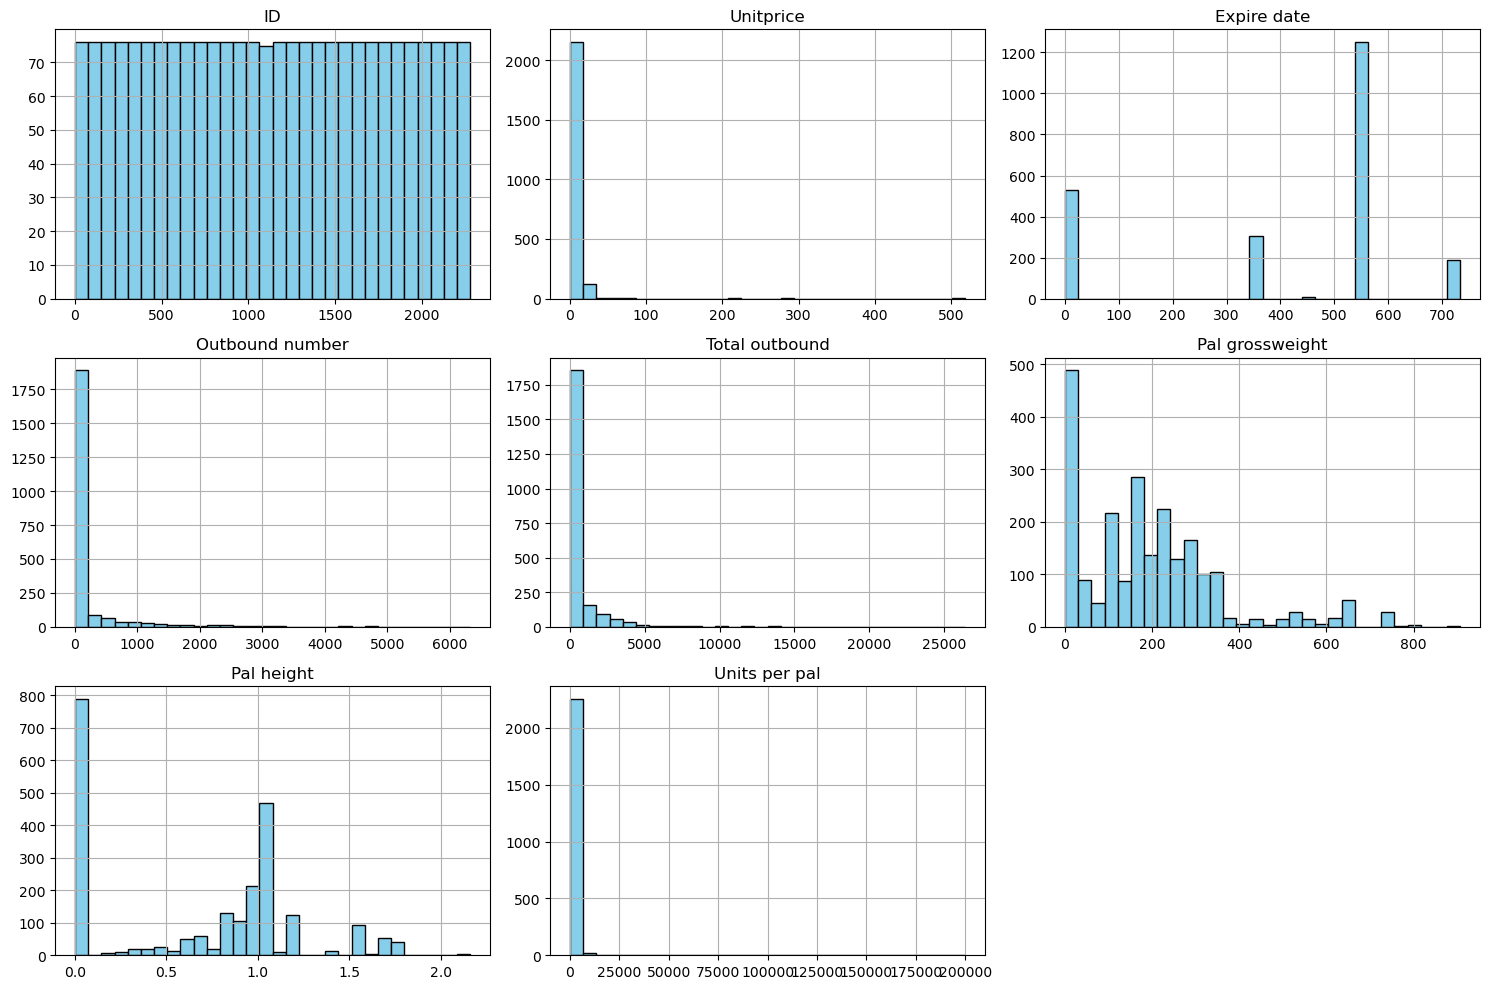

In [35]:
# Visualize distributions of numerical variables
stock.hist(bins=30, figsize=(15, 10), edgecolor='black', color='skyblue')
plt.tight_layout()
plt.savefig('C:/Users/user/Desktop/SALFORD 2/distribution_of_num_values.png')
plt.show()


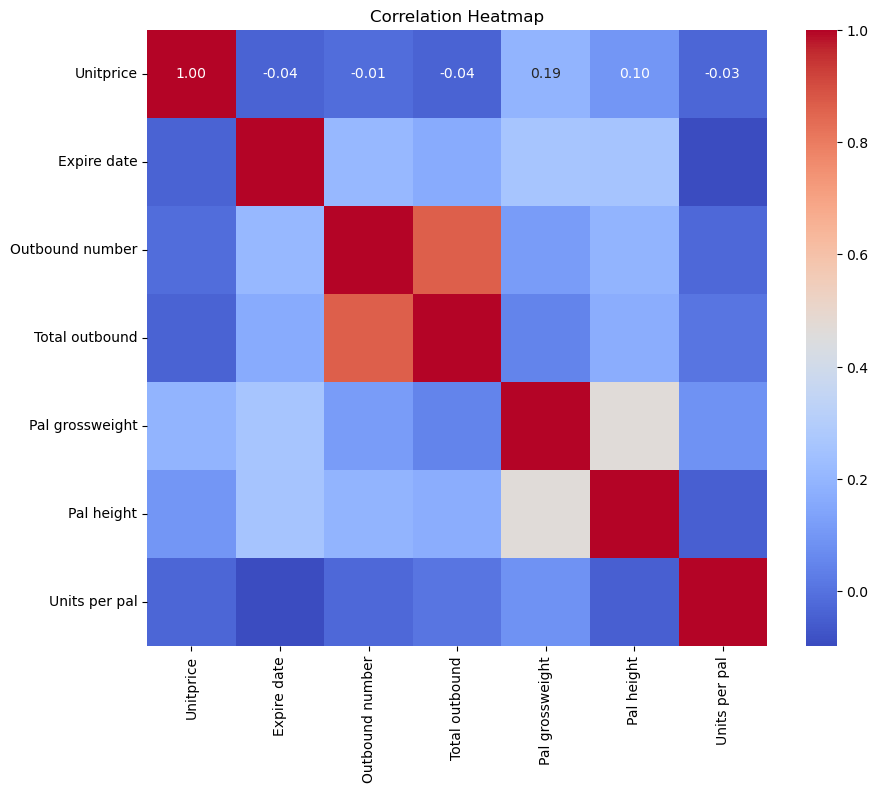

In [36]:
# 3.4. Correlation Heatmap
numerical_features = ['Unitprice', 'Expire date', 'Outbound number', 'Total outbound', 
            'Pal grossweight', 'Pal height', 'Units per pal']

plt.figure(figsize=(10, 8))
corr = stock[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('C:/Users/user/Desktop/SALFORD 2/heatmap.png')
plt.show()

# Preprocessing

In [37]:
stock = stock.drop(columns=['ID'])

In [38]:
cap_value = stock['Units per pal'].quantile(0.99)
stock['Units per pal'] = stock['Units per pal'].clip(upper=cap_value)

In [39]:
# Features for clustering
features = ['Unitprice', 'Expire date', 'Outbound number', 'Total outbound', 
            'Pal grossweight', 'Pal height', 'Units per pal']

# Standardizing features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock[features])
scaled_stock = pd.DataFrame(scaled_data, columns=features)


In [41]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

stock['KMeans_Cluster'] = kmeans_labels


In [42]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(scaled_data)

stock['DBSCAN_Cluster'] = dbscan_labels


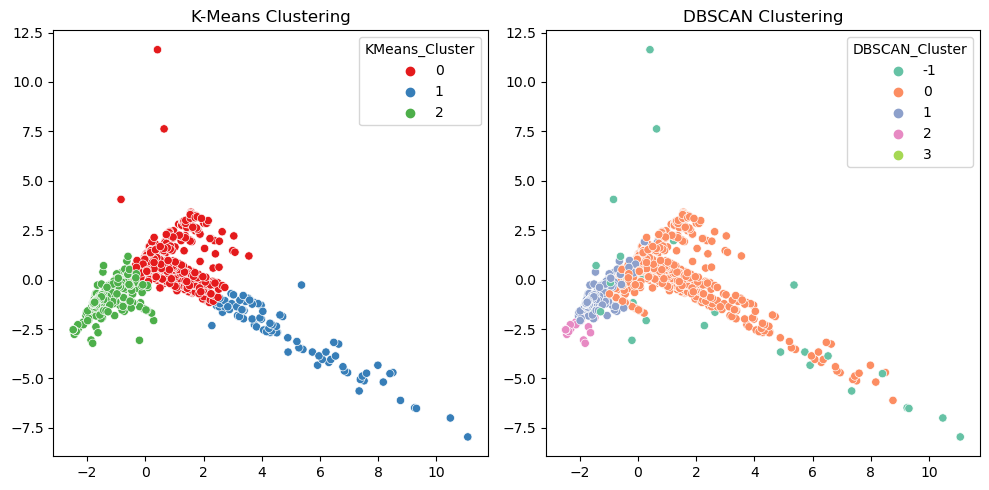

In [43]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot K-Means clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=stock['KMeans_Cluster'], palette='Set1')
plt.title('K-Means Clustering')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=stock['DBSCAN_Cluster'], palette='Set2')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()


In [44]:
# Analyzing clusters
print(stock.groupby('KMeans_Cluster').mean())


                Unitprice  Expire date  Outbound number  Total outbound  \
KMeans_Cluster                                                            
0                6.412403   519.624398       188.051364      491.461477   
1                2.404535   579.663366      2898.158416     8605.175248   
2                1.606497   245.964592        11.549356      199.638412   

                Pal grossweight  Pal height  Units per pal  DBSCAN_Cluster  
KMeans_Cluster                                                              
0                    278.085814    1.031465     394.311396        0.065811  
1                    230.069228    0.978218     318.594059       -0.188119  
2                     75.083039    0.160193     689.226395        0.534335  


In [45]:
print(stock.groupby('DBSCAN_Cluster').mean())

                Unitprice  Expire date  Outbound number  Total outbound  \
DBSCAN_Cluster                                                            
-1              31.701081   340.216216      1324.081081     7670.864865   
 0               4.572805   531.217213       283.412178      761.626288   
 1               1.507768     0.000000         8.985743      142.949084   
 2               0.219455     0.000000        14.500000      576.318182   
 3               0.073086   730.000000         0.000000        0.000000   

                Pal grossweight  Pal height  Units per pal  KMeans_Cluster  
DBSCAN_Cluster                                                              
-1                   322.596541    0.758243    1856.054054        1.000000  
 0                   220.479005    0.773958     316.169789        0.560890  
 1                    84.983739    0.362016     628.474542        1.885947  
 2                    85.290909    0.253636    8000.000000        2.000000  
 3          

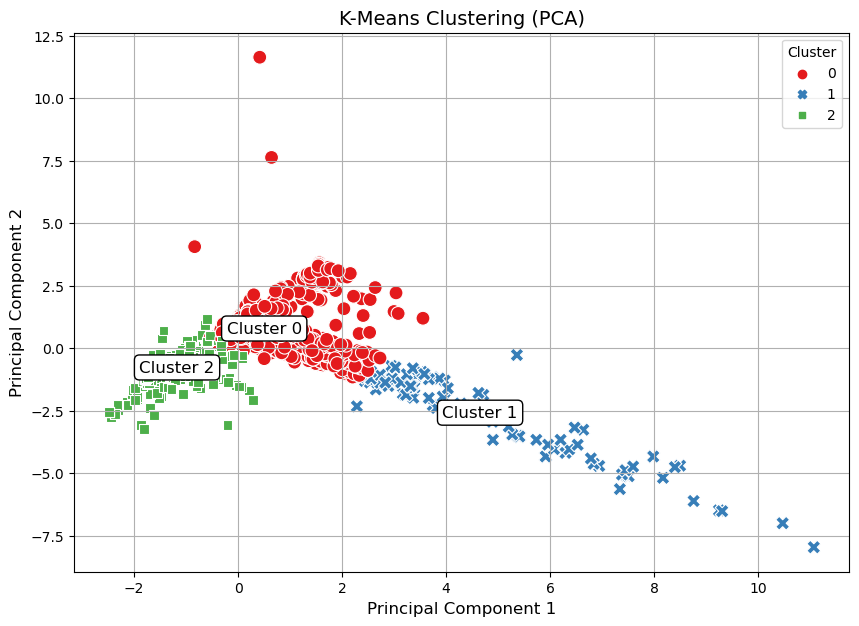

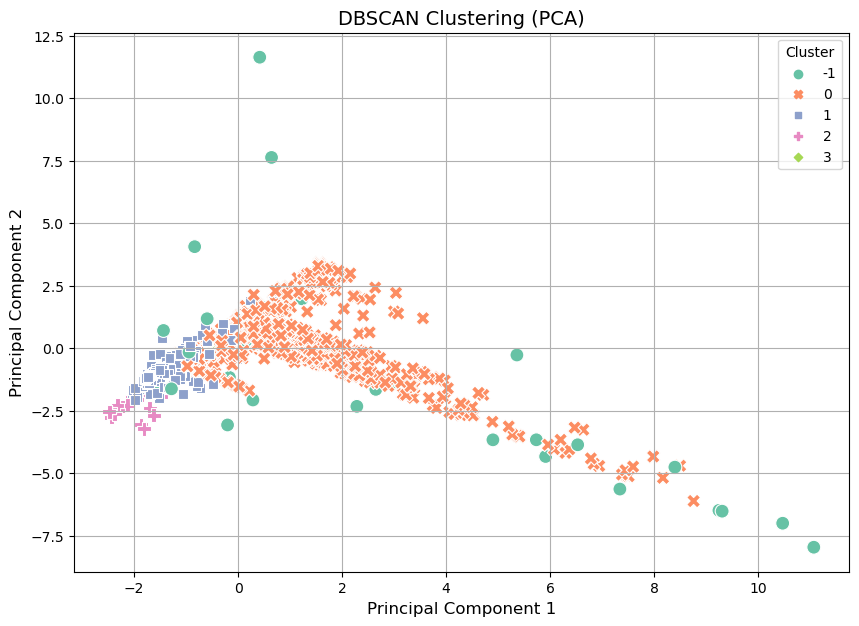

In [46]:
# Reduce dimensions using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce data to 2D using PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

# Add the reduced dimensions to the DataFrame
stock['PCA1'] = reduced_data[:, 0]
stock['PCA2'] = reduced_data[:, 1]

# Define a function to visualize clustering
def plot_clusters(stock, cluster_col, title, palette):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='PCA1', y='PCA2', hue=cluster_col, data=stock, 
        palette=palette, style=cluster_col, s=100
    )
    plt.title(title, fontsize=14)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    
    # Annotate cluster centers for K-Means
    if cluster_col == 'KMeans_Cluster':
        for cluster_id in stock[cluster_col].unique():
            cluster_center = stock[stock[cluster_col] == cluster_id][['PCA1', 'PCA2']].mean()
            plt.text(cluster_center['PCA1'], cluster_center['PCA2'], f'Cluster {cluster_id}',
                     fontsize=12, color='black', ha='center', va='center', 
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.legend(title='Cluster', loc='best')
    plt.grid(True)
    plt.show()

# Visualize K-Means Clustering
plot_clusters(stock, 'KMeans_Cluster', 'K-Means Clustering (PCA)', palette='Set1')

# Visualize DBSCAN Clustering
plot_clusters(stock, 'DBSCAN_Cluster', 'DBSCAN Clustering (PCA)', palette='Set2')


In [47]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# K-Means Evaluation: Silhouette Score
kmeans_silhouette = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

Silhouette Score for K-Means: 0.3408912235543953


In [50]:
# DBSCAN: Silhouette Score 
dbscan_labels = dbscan.labels_
non_noise_mask = dbscan_labels != -1
filtered_data = scaled_data[non_noise_mask]
filtered_labels = dbscan_labels[non_noise_mask]

dbscan_silhouette = silhouette_score(filtered_data, filtered_labels)
print(f"Silhouette Score for DBSCAN (ignoring noise): {dbscan_silhouette}")

Silhouette Score for DBSCAN (ignoring noise): 0.31228413397062593
